# 🌟 ***MODELO NAIVE*** 🌟

# 1) CARGO DATOS

In [1]:
import pandas as pd 
df = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/naive-bayes-project-tutorial/main/playstore_reviews.csv")
df.head()

,package_name,review,polarity
0,com.facebook.katana,privacy at least put some option appear offli...,0
1,com.facebook.katana,"messenger issues ever since the last update, ...",0
2,com.facebook.katana,profile any time my wife or anybody has more ...,0
3,com.facebook.katana,the new features suck for those of us who don...,0
4,com.facebook.katana,forced reload on uploading pic on replying co...,0


# 2) TRATO LOS DATOS

In [9]:
def apply_preprocess(df):
    if "package_name" in df.columns:
        df = df.drop("package_name", axis=1)
    if "review" in df.columns:
        df["review"] = df["review"].astype(str).str.strip().str.upper()
    else:
        print("La columna 'review' no existe en el DataFrame.")
    
    return df
df = apply_preprocess(df)
df.head()

,review,polarity
0,PRIVACY AT LEAST PUT SOME OPTION APPEAR OFFLIN...,0
1,"MESSENGER ISSUES EVER SINCE THE LAST UPDATE, I...",0
2,PROFILE ANY TIME MY WIFE OR ANYBODY HAS MORE T...,0
3,THE NEW FEATURES SUCK FOR THOSE OF US WHO DON'...,0
4,FORCED RELOAD ON UPLOADING PIC ON REPLYING COM...,0


# 3) SEPARO PARA TRAIN TESTT

### 3.0) PREVIO

In [10]:
from sklearn.model_selection import train_test_split
X = df["review"]
y = df["polarity"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train.head()

331    JUST DID THE LATEST UPDATE ON VIBER AND YET AG...
733    KEEPS CRASHING IT ONLY WORKS WELL IN EXTREME D...
382    THE FAIL BOAT HAS ARRIVED THE 6.0 VERSION IS T...
704    SUPERFAST, JUST AS I REMEMBER IT ! OPERA MINI ...
813    INSTALLED AND IMMEDIATELY DELETED THIS CRAP I ...
Name: review, dtype: object

In [11]:
from sklearn.feature_extraction.text import CountVectorizer
vec_model = CountVectorizer(stop_words = "english")
X_train = vec_model.fit_transform(X_train).toarray()
X_test = vec_model.transform(X_test).toarray()
X_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

### 3.1) Voy a ver si puedo pintarlo

In [ ]:
import pandas as pd
feature_names = vec_model.get_feature_names_out()
X_train_df = pd.DataFrame(X_train, columns=feature_names)
X_train_df.head()

,000,04,0x,10,100,101,11,113mb,1186,12,...,šŕ,šŕľ,ťŕ,ťŕľ,źŕ,żŕ,żŕľ,žŕ,žŕľ,ˇŕ
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


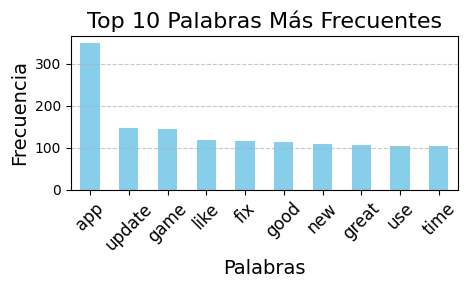

In [14]:
import matplotlib.pyplot as plt
word_frequencies = X_train_df.sum(axis=0).sort_values(ascending=False)
top_words = word_frequencies.head(10)
plt.figure(figsize=(5, 2))
top_words.plot(kind='bar', color='skyblue')
plt.title('Top 10 Palabras Más Frecuentes', fontsize=16)
plt.xlabel('Palabras', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# 4) MODELO BAYES

In [15]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

### 4.1) PREDICCION

In [16]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0])

 ### 4.2) VEO MI ACCURRACY PARA VER EFICACIA

In [17]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8156424581005587

In [18]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB
for model_aux in [GaussianNB(), BernoulliNB()]:
    model_aux.fit(X_train, y_train)
    y_pred_aux = model_aux.predict(X_test)
    print(f"{model_aux} with accuracy: {accuracy_score(y_test, y_pred_aux)}")

GaussianNB() with accuracy: 0.8044692737430168
BernoulliNB() with accuracy: 0.770949720670391


# 5) OPTIMIZO Y GUARDO

In [24]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

model = MultinomialNB()
param_grid = {
    'alpha': [0.1, 0.5, 1.0, 2.0],  
    'fit_prior': [True, False]     
}
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1)
grid_search.fit(X_train, y_train)
print("Mejores hiperparámetros:", grid_search.best_params_)
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
print(classification_report(y_test, y_pred))

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Mejores hiperparámetros: {'alpha': 2.0, 'fit_prior': False}
              precision    recall  f1-score   support

           0       0.86      0.90      0.88       126
           1       0.72      0.64      0.68        53

    accuracy                           0.82       179
   macro avg       0.79      0.77      0.78       179
weighted avg       0.82      0.82      0.82       179



In [ ]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
hyperparams = {
    "alpha": np.linspace(0.01, 10.0, 200),
    "fit_prior": [True, False]
}
random_search = RandomizedSearchCV(model, hyperparams, n_iter = 50, scoring = "accuracy", cv = 5, random_state = 42)
random_search

RandomizedSearchCV(cv=5, estimator=MultinomialNB(), n_iter=50,
                   param_distributions={'alpha': array([ 0.01      ,  0.06020101,  0.11040201,  0.16060302,  0.21080402,
        0.26100503,  0.31120603,  0.36140704,  0.41160804,  0.46180905,
        0.51201005,  0.56221106,  0.61241206,  0.66261307,  0.71281407,
        0.76301508,  0.81321608,  0.86341709,  0.91361809,  0.9638191 ,
        1.0140201 ,  1.06422111,  1.11442211,  1.1646231...
        8.54417085,  8.59437186,  8.64457286,  8.69477387,  8.74497487,
        8.79517588,  8.84537688,  8.89557789,  8.94577889,  8.9959799 ,
        9.0461809 ,  9.09638191,  9.14658291,  9.19678392,  9.24698492,
        9.29718593,  9.34738693,  9.39758794,  9.44778894,  9.49798995,
        9.54819095,  9.59839196,  9.64859296,  9.69879397,  9.74899497,
        9.79919598,  9.84939698,  9.89959799,  9.94979899, 10.        ]),
                                        'fit_prior': [True, False]},
                   random_state=42, scoring='accuracy')

In [26]:
random_search.fit(X_train, y_train)

print(f"Best hyperparameters: {random_search.best_params_}")

Best hyperparameters: {'fit_prior': False, 'alpha': np.float64(1.917638190954774)}


In [27]:
model = MultinomialNB(alpha = 1.917638190954774, fit_prior = False)
model.fit(X_train, y_train)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

0.8212290502793296

In [30]:
from pickle import dump
import os

# Ensure the directory exists
os.makedirs("models", exist_ok=True)

# Save the model
dump(model, open("models/naive_bayes_alpha_1-9176382_fit_prior_False_42.sav", "wb"))